In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install pmdarima

In [3]:
df=pd.read_csv('sst.csv')
#df.index.freq = 'D'

In [4]:
df

,time,latitude,longitude,SST
0,2013-01-02T00:00:00Z,12.75,74.00,28.80
1,2013-01-02T00:00:00Z,12.75,74.25,28.95
2,2013-01-02T00:00:00Z,13.00,74.00,28.80
3,2013-01-02T00:00:00Z,13.00,74.25,28.95
4,2013-01-03T00:00:00Z,12.75,74.00,29.10
...,...,...,...,...
12035,2021-04-01T00:00:00Z,13.00,74.25,NaN
12036,2021-04-02T00:00:00Z,12.75,74.00,31.05
12037,2021-04-02T00:00:00Z,12.75,74.25,NaN
12038,2021-04-02T00:00:00Z,13.00,74.00,30.90


In [5]:
df['time'] = pd.to_datetime(df['time']).dt.date

In [6]:
df.head()

,time,latitude,longitude,SST
0,2013-01-02,12.75,74.00,28.80
1,2013-01-02,12.75,74.25,28.95
2,2013-01-02,13.00,74.00,28.80
3,2013-01-02,13.00,74.25,28.95
4,2013-01-03,12.75,74.00,29.10


In [7]:
df['Date'] = pd.to_datetime(df['time'] )


In [8]:
df.head()

,time,latitude,longitude,SST,Date
0,2013-01-02,12.75,74.00,28.80,2013-01-02
1,2013-01-02,12.75,74.25,28.95,2013-01-02
2,2013-01-02,13.00,74.00,28.80,2013-01-02
3,2013-01-02,13.00,74.25,28.95,2013-01-02
4,2013-01-03,12.75,74.00,29.10,2013-01-03


In [9]:
df = df.set_index('Date')

In [10]:
df.index

DatetimeIndex(['2013-01-02', '2013-01-02', '2013-01-02', '2013-01-02',
               '2013-01-03', '2013-01-03', '2013-01-03', '2013-01-03',
               '2013-01-04', '2013-01-04',
               ...
               '2021-03-31', '2021-03-31', '2021-04-01', '2021-04-01',
               '2021-04-01', '2021-04-01', '2021-04-02', '2021-04-02',
               '2021-04-02', '2021-04-02'],
              dtype='datetime64[ns]', name='Date', length=12040, freq=None)

In [11]:
df=df.drop('time',axis=1)
df.head()

,latitude,longitude,SST
Date,,,
2013-01-02,12.75,74.00,28.80
2013-01-02,12.75,74.25,28.95
2013-01-02,13.00,74.00,28.80
2013-01-02,13.00,74.25,28.95
2013-01-03,12.75,74.00,29.10


In [12]:
df['SST']

Date
2013-01-02    28.80
2013-01-02    28.95
2013-01-02    28.80
2013-01-02    28.95
2013-01-03    29.10
              ...  
2021-04-01      NaN
2021-04-02    31.05
2021-04-02      NaN
2021-04-02    30.90
2021-04-02      NaN
Name: SST, Length: 12040, dtype: float64

In [13]:
len(df)

12040

In [14]:
df.isnull().sum()

latitude        0
longitude       0
SST          5556
dtype: int64

In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

latitude     0
longitude    0
SST          0
dtype: int64

In [17]:
# daily Means
df=df.resample(rule='D').mean()
df.head()

,latitude,longitude,SST
Date,,,
2013-01-02,12.875,74.125,28.875
2013-01-03,12.875,74.125,29.025
2013-01-04,12.875,74.125,29.100
2013-01-05,12.875,74.000,29.325
2013-01-06,12.875,74.000,29.025


In [18]:
df.isnull().sum()

latitude     183
longitude    183
SST          183
dtype: int64

In [19]:
len(df)

3013

In [20]:
df.to_csv('abc',sep='\t')

In [21]:
len(df)

3013

In [22]:
df= df.fillna(method='ffill')

In [23]:
df.isnull().sum()

latitude     0
longitude    0
SST          0
dtype: int64

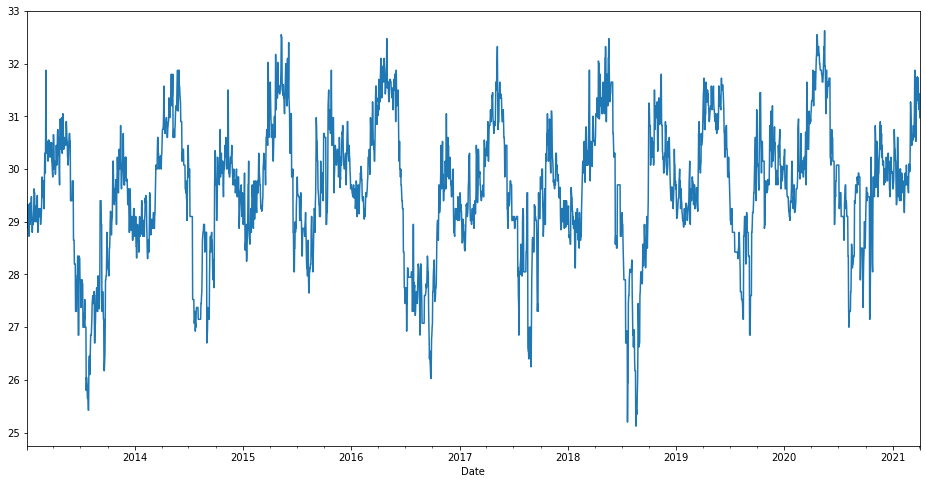

In [24]:
df['SST'].plot(figsize=(16,8));

In [25]:
df=df.drop(['latitude', 'longitude'],axis=1)
df.head()

,SST
Date,
2013-01-02,28.875
2013-01-03,29.025
2013-01-04,29.100
2013-01-05,29.325
2013-01-06,29.025


In [26]:
train_data=df[:3006]
train_data

,SST
Date,
2013-01-02,28.875
2013-01-03,29.025
2013-01-04,29.100
2013-01-05,29.325
2013-01-06,29.025
...,...
2021-03-22,31.275
2021-03-23,31.725
2021-03-24,31.350


In [27]:
test_data=df.tail(7)
test_data

,SST
Date,
2021-03-27,31.7250
2021-03-28,31.7250
2021-03-29,31.2375
2021-03-30,31.2750
2021-03-31,31.1250
2021-04-01,31.4250
2021-04-02,30.9750


In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
adfuller(df['SST'],autolag='AIC')
#1-test statistics , 2-p value ,3-no of lags ,4-no of observation , 5-critical value at 1%,5%,10% respectively)



(-5.015126883593307,
 2.071308055032421e-05,
 25,
 2987,
 {'1%': -3.4325411377931645,
  '10%': -2.5672853466382444,
  '5%': -2.8625081024316796},
 1704.8554454286386)

In [30]:
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

In [31]:
# Set one year for testing   #total 96 data
train = df.iloc[:3006]
test = df.iloc[3006:]

In [32]:
model = AR(train['SST'])
AR1fit = model.fit(method='mle')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [33]:
AR1fit.params

const      0.814038
L1.SST     1.026455
L2.SST    -0.133232
L3.SST    -0.124213
L4.SST     0.188140
L5.SST    -0.026371
L6.SST    -0.003012
L7.SST     0.064976
L8.SST    -0.044210
L9.SST     0.050123
L10.SST   -0.043898
L11.SST    0.019966
L12.SST   -0.017183
L13.SST    0.005638
L14.SST    0.028428
L15.SST   -0.048844
L16.SST    0.069289
L17.SST   -0.051315
L18.SST    0.012469
L19.SST   -0.003978
L20.SST    0.016917
L21.SST    0.037788
L22.SST   -0.076986
L23.SST    0.084503
L24.SST   -0.051115
L25.SST    0.067230
L26.SST   -0.058761
L27.SST    0.008358
L28.SST   -0.024626
dtype: float64

In [34]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')
predictions1

2021-03-27    31.299683
2021-03-28    31.173622
2021-03-29    31.175695
2021-03-30    31.163870
2021-03-31    31.104096
2021-04-01    31.165856
2021-04-02    31.069263
Freq: D, Name: AR(1) Predictions, dtype: float64

In [35]:
test

,SST
Date,
2021-03-27,31.7250
2021-03-28,31.7250
2021-03-29,31.2375
2021-03-30,31.2750
2021-03-31,31.1250
2021-04-01,31.4250
2021-04-02,30.9750


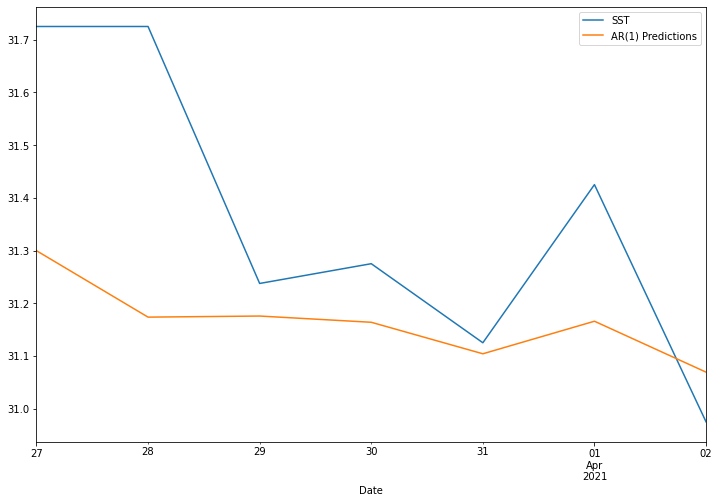

In [36]:
test['SST'].plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
error = mean_squared_error(test['SST'],predictions1,squared=False)
error

0.2872430391003961

In [39]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [40]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [41]:
stepwise_fit = auto_arima(df['SST'], start_p=0, start_q=0,
                          
                          seasonal=False,
                          trace=True)
                          
                

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1921.129, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1915.574, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1914.325, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1919.142, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1915.107, Time=1.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1902.176, Time=0.99 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1812.873, Time=2.95 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1785.441, Time=2.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1796.711, Time=2.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1753.653, Time=3.76 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1759.221, Time=2.04 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1750.009, Time=6.81 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1748.990, Time=4.95 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1761.831, Time=0.67 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

In [42]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3013
Model:               SARIMAX(4, 1, 1)   Log Likelihood                -867.513
Date:                Sat, 10 Jul 2021   AIC                           1747.027
Time:                        10:13:53   BIC                           1783.089
Sample:                             0   HQIC                          1759.996
                               - 3013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8558      0.073     11.705      0.000       0.712       0.999
ar.L2         -0.1063      0.025     -4.259      0.000      -0.155      -0.057
ar.L3         -0.1479      0.023     -6.545      0.000      -0.192      -0.104
ar.L4          0.1318      0.027      4.807      0.000       0.078       0.186
ma.L1         -0.8329      0.068    -12.175      0.000      -0.967      -0.699
sigma2         0.1041      0.001     79.692      0.000       0.102       0.107
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6906.10
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.84
Prob(H) (two-sided):                  0.61   Kurtosis:                        10.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

In [44]:
# Set one month for testing
train = df.iloc[:3006]
test = df.iloc[3006:]
print(train)

               SST
Date              
2013-01-02  28.875
2013-01-03  29.025
2013-01-04  29.100
2013-01-05  29.325
2013-01-06  29.025
...            ...
2021-03-22  31.275
2021-03-23  31.725
2021-03-24  31.350
2021-03-25  31.750
2021-03-26  31.300

[3006 rows x 1 columns]


In [45]:
model = ARMA(train['SST'],order=(4,3))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    SST   No. Observations:                 3006
Model:                     ARMA(4, 3)   Log Likelihood                -852.782
Method:                       css-mle   S.D. of innovations              0.321
Date:                Sat, 10 Jul 2021   AIC                           1723.564
Time:                        10:13:54   BIC                           1777.639
Sample:                    01-02-2013   HQIC                          1743.013
                         - 03-26-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6443      0.239    123.935      0.000      29.176      30.113
ar.L1.SST      1.0751      0.094     11.458      0.000       0.891       1.259
ar.L2.SST     -0.0565      0.145     -0.389      0.697      -0.341       0.228
ar.L3.SST     -0.0505      0.123     -0.411      0.681      -0.291       0.190
ar.L4.SST      0.0168      0.076      0.222      0.824      -0.132       0.165
ma.L1.SST     -0.0554      0.092     -0.600      0.549      -0.236       0.126
ma.L2.SST     -0.1162      0.078     -1.494      0.135      -0.269       0.036
ma.L3.SST     -0.2022      0.077     -2.633      0.008      -0.353      -0.052
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0172           -0.0000j            1.0172           -0.0000
AR.2           -3.7107           -0.0000j            3.7107           -0.5000
AR.3            2.8478           -2.7648j            3.9692           -0.1226
AR.4            2.8478           +2.7648j            3.9692            0.1226
MA.1            1.4846           -0.0000j            1.4846           -0.0000
MA.2           -1.0295           -1.5069j            1.8250           -0.3454
MA.3           -1.0295           +1.5069j            1.8250            0.3454
-----------------------------------------------------------------------------
"""

In [46]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

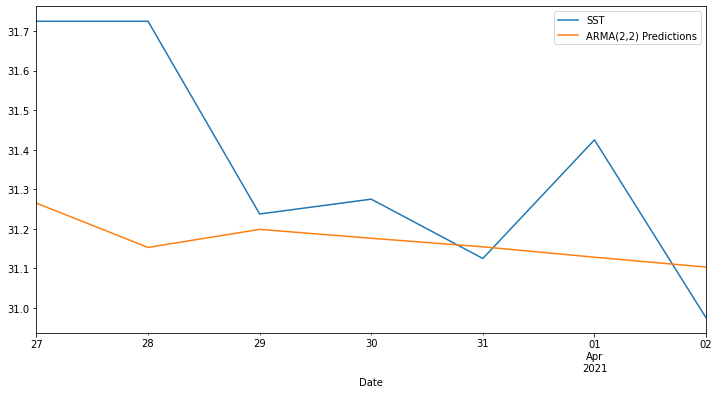

In [47]:
test['SST'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

In [48]:
error = mean_squared_error(test['SST'],predictions,squared=False)
error

0.30605410455587273

In [49]:
model = ARIMA(train['SST'],order=(4,1,3))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.SST   No. Observations:                 3005
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -843.836
Method:                       css-mle   S.D. of innovations              0.320
Date:                Sat, 10 Jul 2021   AIC                           1705.673
Time:                        10:13:58   BIC                           1759.745
Sample:                    01-03-2013   HQIC                          1725.121
                         - 03-26-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0008      0.004      0.203      0.839      -0.007       0.008
ar.L1.D.SST    -1.0322      0.044    -23.203      0.000      -1.119      -0.945
ar.L2.D.SST     0.2215      0.082      2.714      0.007       0.062       0.382
ar.L3.D.SST     0.3400      0.057      5.997      0.000       0.229       0.451
ar.L4.D.SST    -0.2296      0.019    -12.113      0.000      -0.267      -0.192
ma.L1.D.SST     1.0794      0.044     24.526      0.000       0.993       1.166
ma.L2.D.SST    -0.3016      0.078     -3.880      0.000      -0.454      -0.149
ma.L3.D.SST    -0.6605      0.044    -14.894      0.000      -0.747      -0.574
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9324           -0.3943j            1.0124           -0.4363
AR.2           -0.9324           +0.3943j            1.0124            0.4363
AR.3            1.6730           -1.2046j            2.0616           -0.0993
AR.4            1.6730           +1.2046j            2.0616            0.0993
MA.1            1.4288           -0.0000j            1.4288           -0.0000
MA.2           -0.9427           -0.4135j            1.0294           -0.4342
MA.3           -0.9427           +0.4135j            1.0294            0.4342
-----------------------------------------------------------------------------
"""

In [50]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions2 = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(4,1,3) Predictions')
predictions2

2021-03-27    31.286118
2021-03-28    31.246160
2021-03-29    31.289040
2021-03-30    31.335840
2021-03-31    31.287960
2021-04-01    31.372832
2021-04-02    31.282016
Freq: D, Name: ARIMA(4,1,3) Predictions, dtype: float64

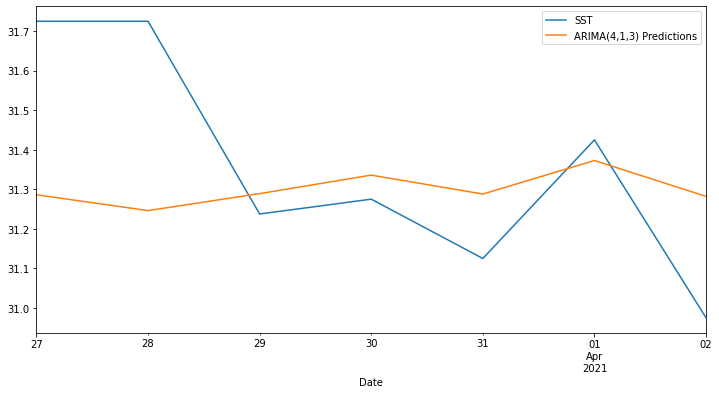

In [51]:
test['SST'].plot(legend=True,figsize=(12,6))
predictions2.plot(legend=True)

In [52]:
error = mean_squared_error(test['SST'],predictions2,squared=False)
error

0.2807640995560864